In [1]:
# Imports and initial setup

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# Reading input data from file

data = list()

hand = open('data/no_nights_db.csv')
next(hand)
for line in hand:
    line = line.rstrip()
    numbers = line.split(',')
    data.append(numbers[3:])

# for i in range(len(data)):
#     print(data[i], sep='\n')

In [3]:
# Extracting averages from data

# Indexes:
# # S1_Temp,S2_Temp,S3_Temp,S4_Temp     [0:3]
# # S1_Light,S2_Light,S3_Light,S4_Light [4:7]
# # S1_Sound,S2_Sound,S3_Sound,S4_Sound [8:11]
# # S5_CO2                              [12]
# # S5_CO2_Slope                        [13]
# # S6_PIR,S7_PIR                       [14:15]
# # Room_Occupancy_Count                [16]

temp_avg = list()
sound_avg = list()
slope_avg = list()

for i in range(len(data)):
    temp_avg.append(round((float(data[i][0]) + float(data[i][1]) + float(data[i][2]) + float(data[i][3]))/4, 2))
    sound_avg.append(round((float(data[i][8]) * float(data[i][9]) * float(data[i][10]) * float(data[i][11])) ** (1/4), 2))
    slope_avg.append(float(data[i][13]))


# print(temp_avg)
# print(sound_avg)

In [4]:
# Setting data conditional to the occupancy count

occupancy_count = [0, 0, 0, 0]

temp = list()
sound = list()
slope = list()

for i in range(4):
    temp.append([])
    sound.append([])
    slope.append([])

for i in range(len(data)):
    if(data[i][16] == '0'):
        occupancy_count[0] += 1
        temp[0].append(temp_avg[i])
        sound[0].append(sound_avg[i])
        slope[0].append(slope_avg[i])
    elif(data[i][16] == '1'):
        occupancy_count[1] += 1
        temp[1].append(temp_avg[i])
        sound[1].append(sound_avg[i])
        slope[1].append(slope_avg[i])
    elif(data[i][16] == '2'):
        occupancy_count[2] += 1
        temp[2].append(temp_avg[i])
        sound[2].append(sound_avg[i])
        slope[2].append(slope_avg[i])
    elif(data[i][16] == '3'):
        occupancy_count[3] += 1
        temp[3].append(temp_avg[i])
        sound[3].append(sound_avg[i])
        slope[3].append(slope_avg[i])

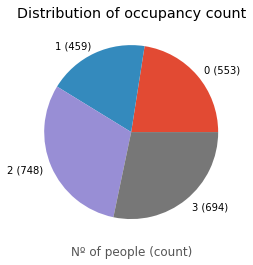

In [5]:
# Plotting occupancy count

plt.pie(occupancy_count, labels=[
        '0 (' + str(occupancy_count[0]) + ')', 
        '1 (' + str(occupancy_count[1]) + ')', 
        '2 (' + str(occupancy_count[2]) + ')', 
        '3 (' + str(occupancy_count[3]) + ')'])
plt.title('Distribution of occupancy count')
plt.xlabel('Nº of people (count)')
plt.savefig('charts/occupancy-count')
plt.show()

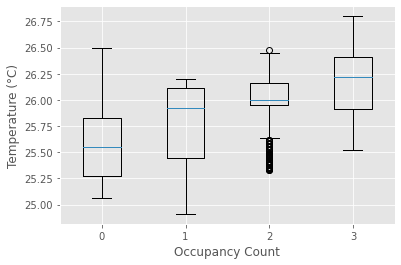

In [6]:
# Plotting temperature relative to occupancy count

plt.boxplot(temp, labels=['0', '1', '2', '3'])
plt.xlabel('Occupancy Count')
plt.ylabel('Temperature (°C)')
plt.savefig('charts/temp')
plt.show()

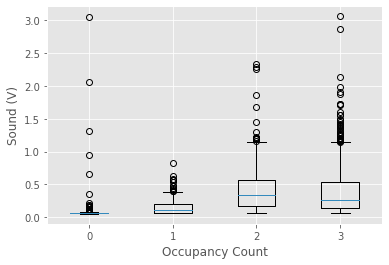

In [7]:
# Plotting sound relative to occupancy count

plt.boxplot(sound, labels=['0', '1', '2', '3'])
plt.xlabel('Occupancy Count')
plt.ylabel('Sound (V)')
plt.savefig('charts/sound')
plt.show()

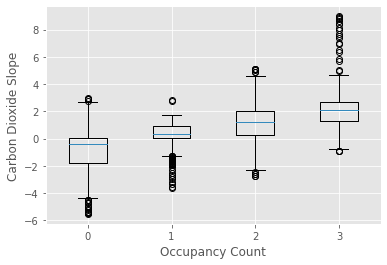

In [8]:
# Plotting CO2 slope relative to occupancy count

plt.boxplot(slope, labels=['0', '1', '2', '3'])
plt.xlabel('Occupancy Count')
plt.ylabel('Carbon Dioxide Slope')
plt.savefig('charts/slope')
plt.show()